### Code for visualization and comparing initial and final distributions and changes in the network over time

In [ ]:
import pandas as pd
import numpy as np
import sys

import pylab as plt
import seaborn as sns

In [14]:
def get_final_data(run):
    
    df1 = pd.read_csv('results/final_results/TOL/final_data_' + str(run) +'00.csv')
    df2 = pd.read_csv('results/final_results/TOL/final_data_' + str(run) +'11.csv')
    df3 = pd.read_csv('results/final_results/TOL/final_data_' + str(run) +'22.csv')
    
    return df1, df2, df3

def get_results_data(run):
    
    df1 = pd.read_csv('results/final_results/TOL/results_' + str(run) +'0.csv')
    df2 = pd.read_csv('results/final_results/TOL/results_' + str(run) +'1.csv')
    df3 = pd.read_csv('results/final_results/TOL/results_' + str(run) +'2.csv')
    
    return df1, df2, df3

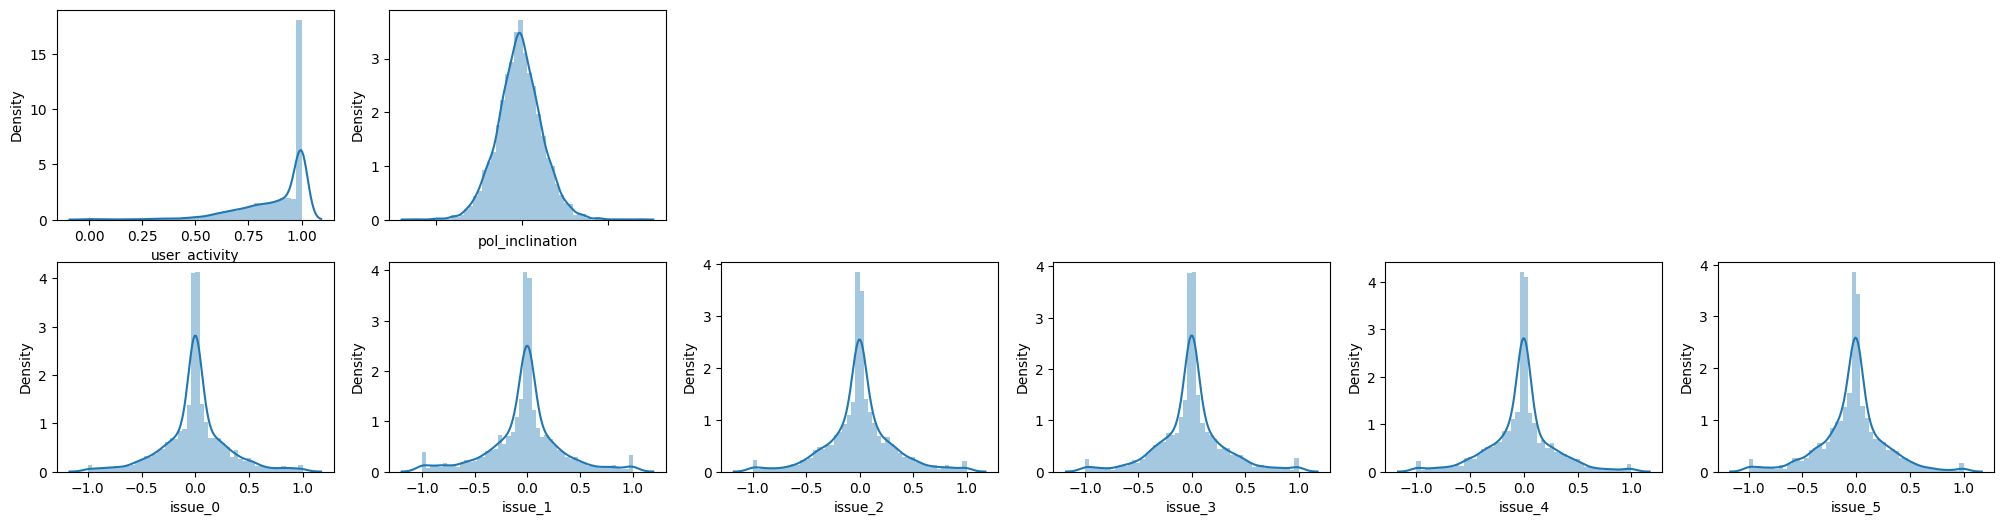

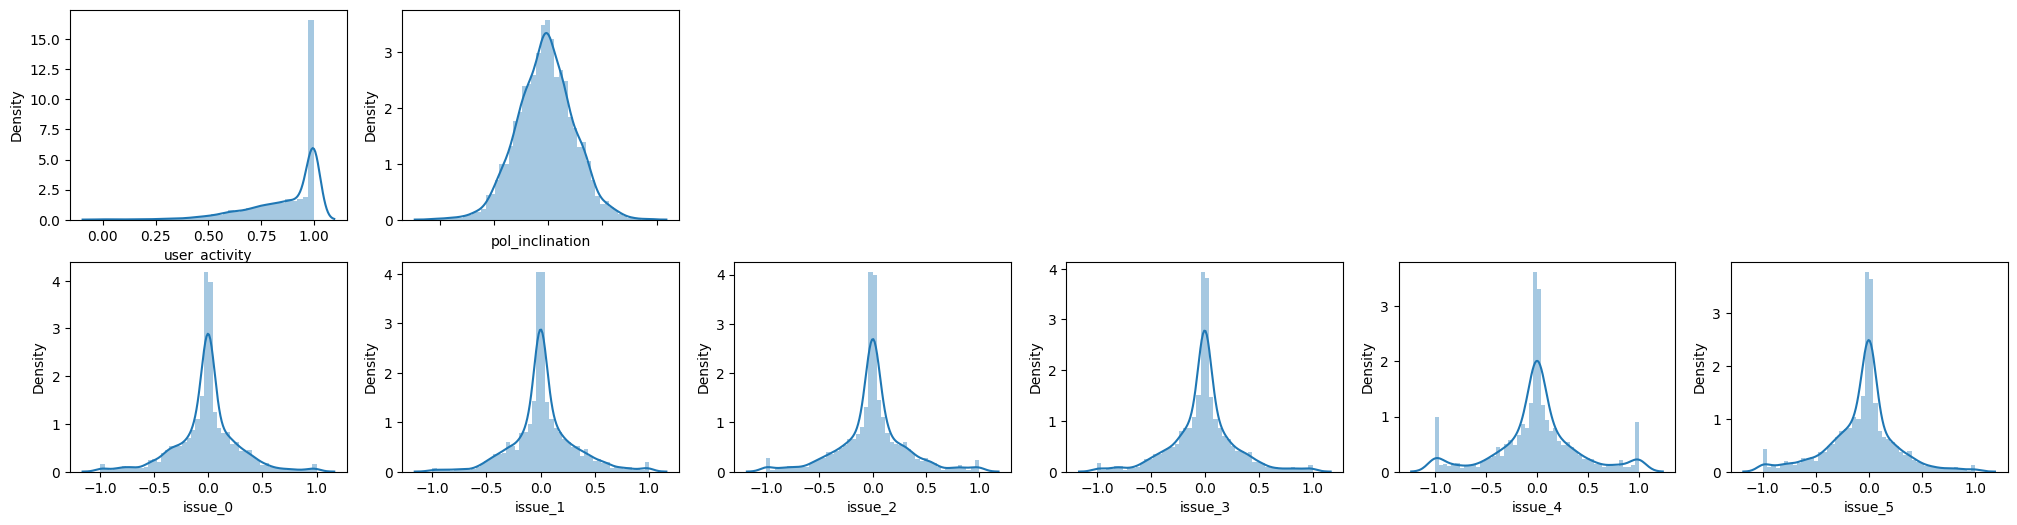

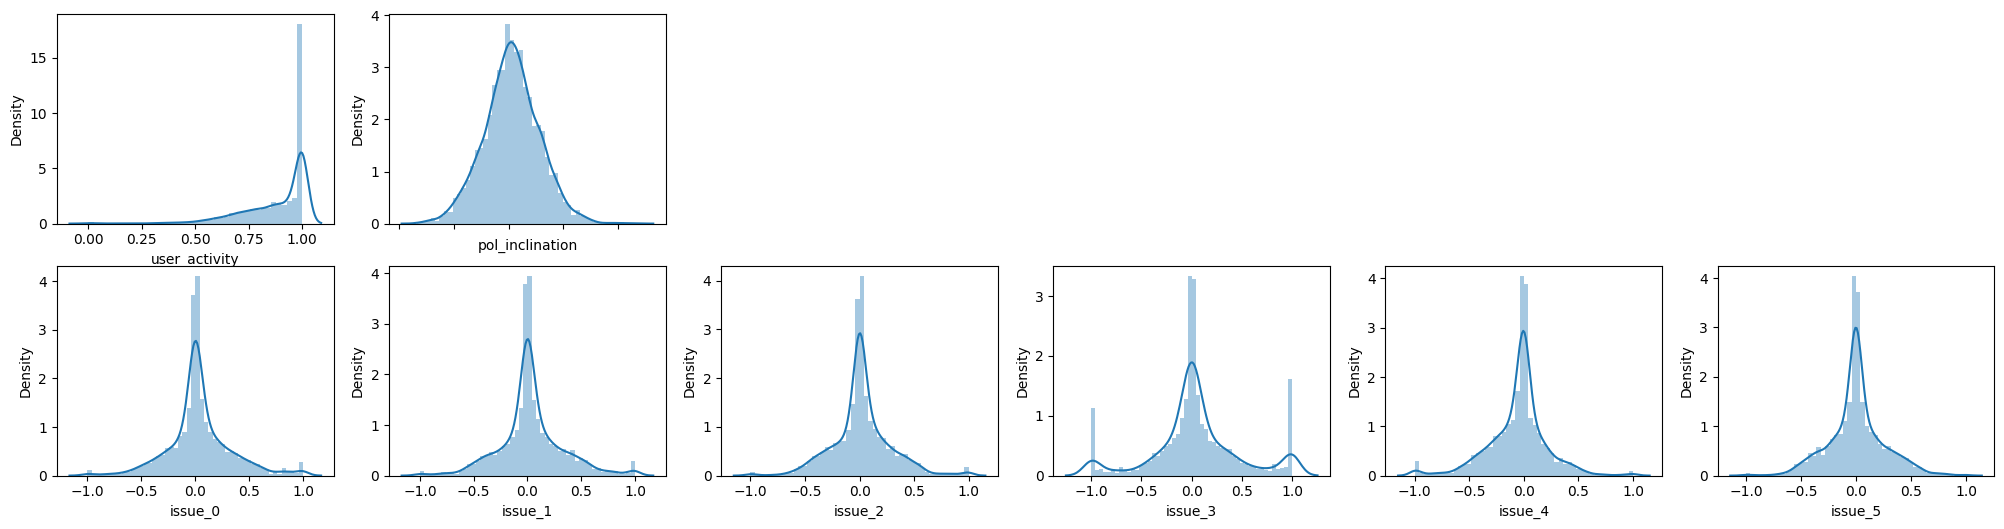

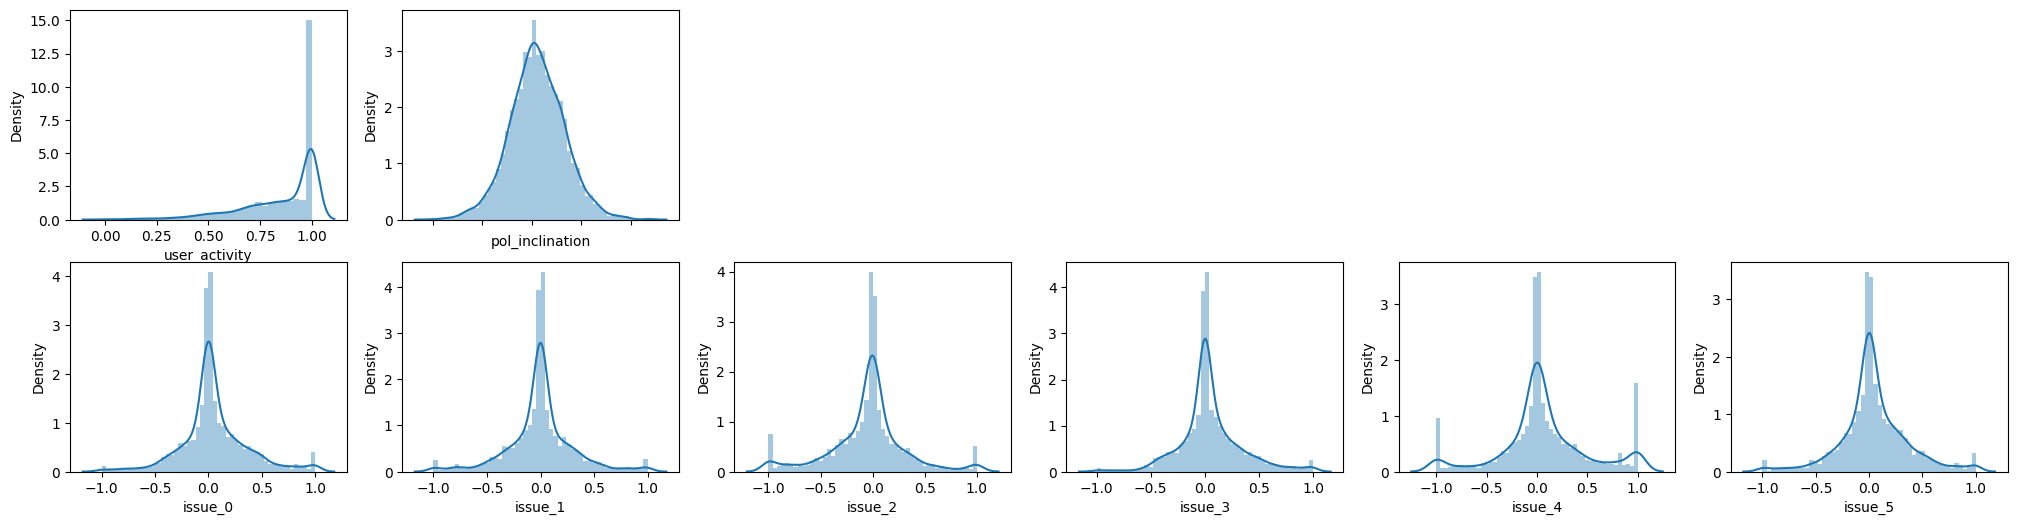

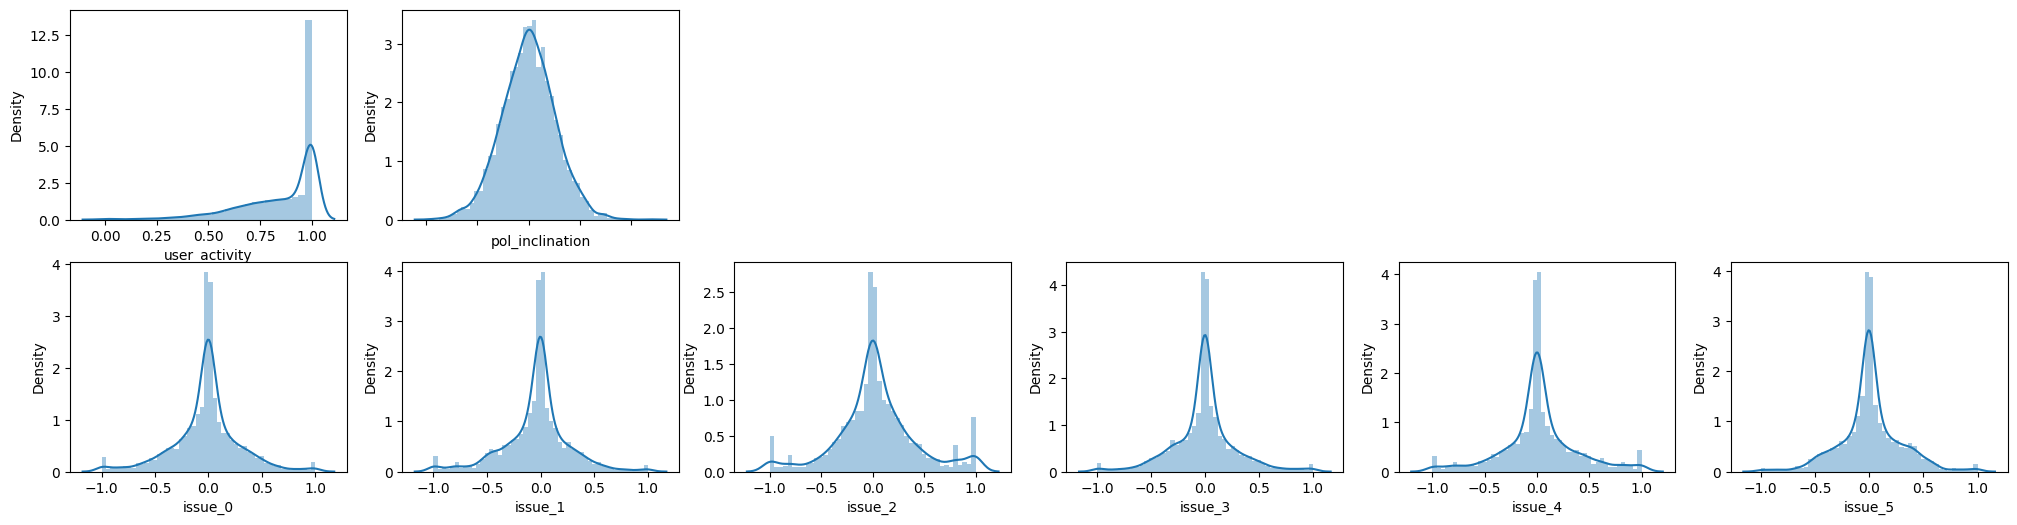

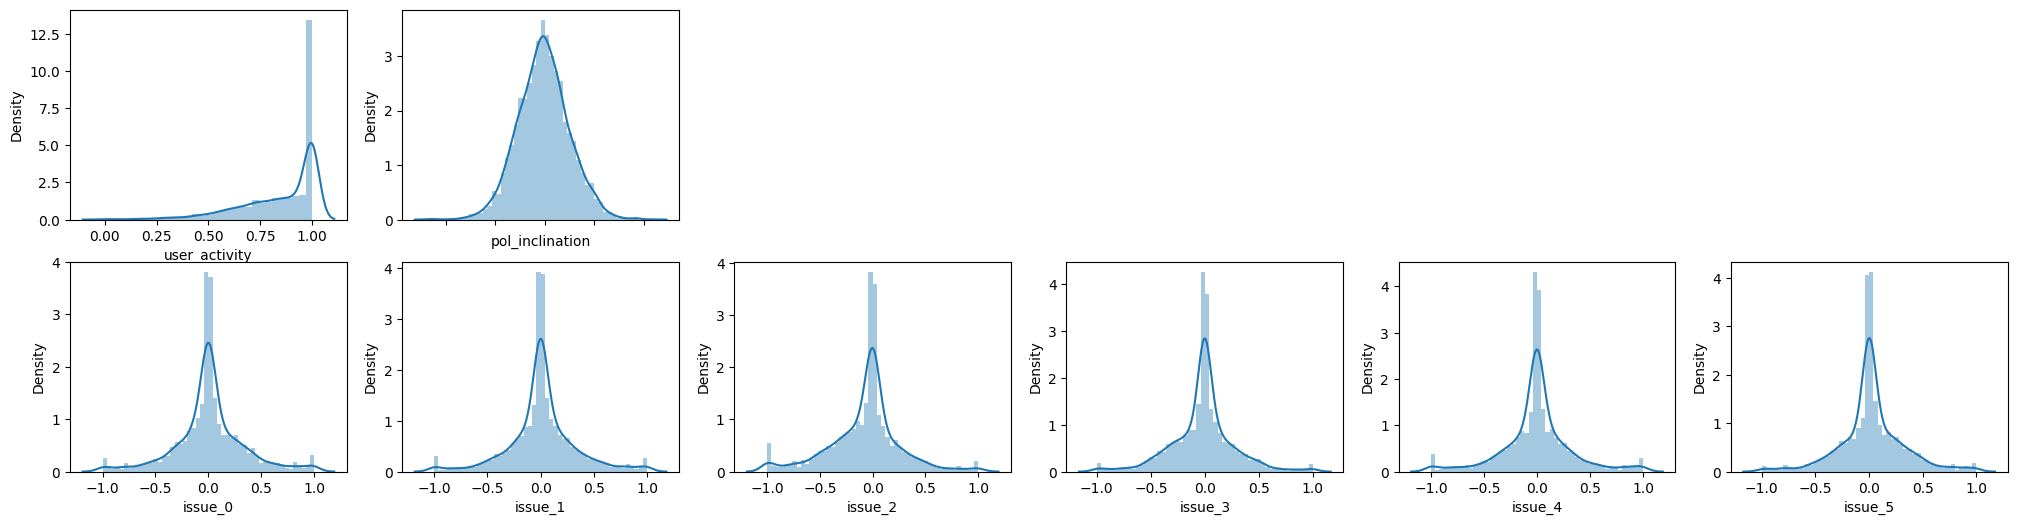

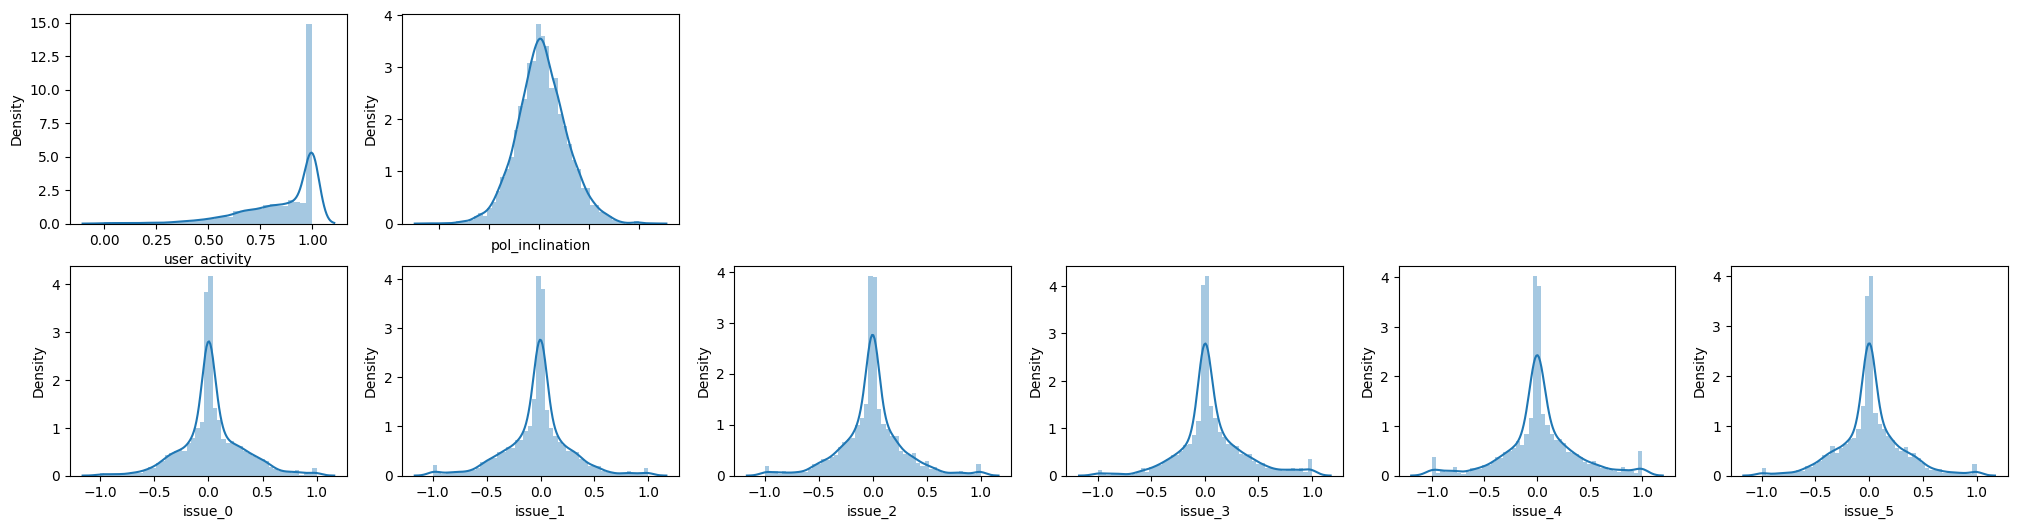

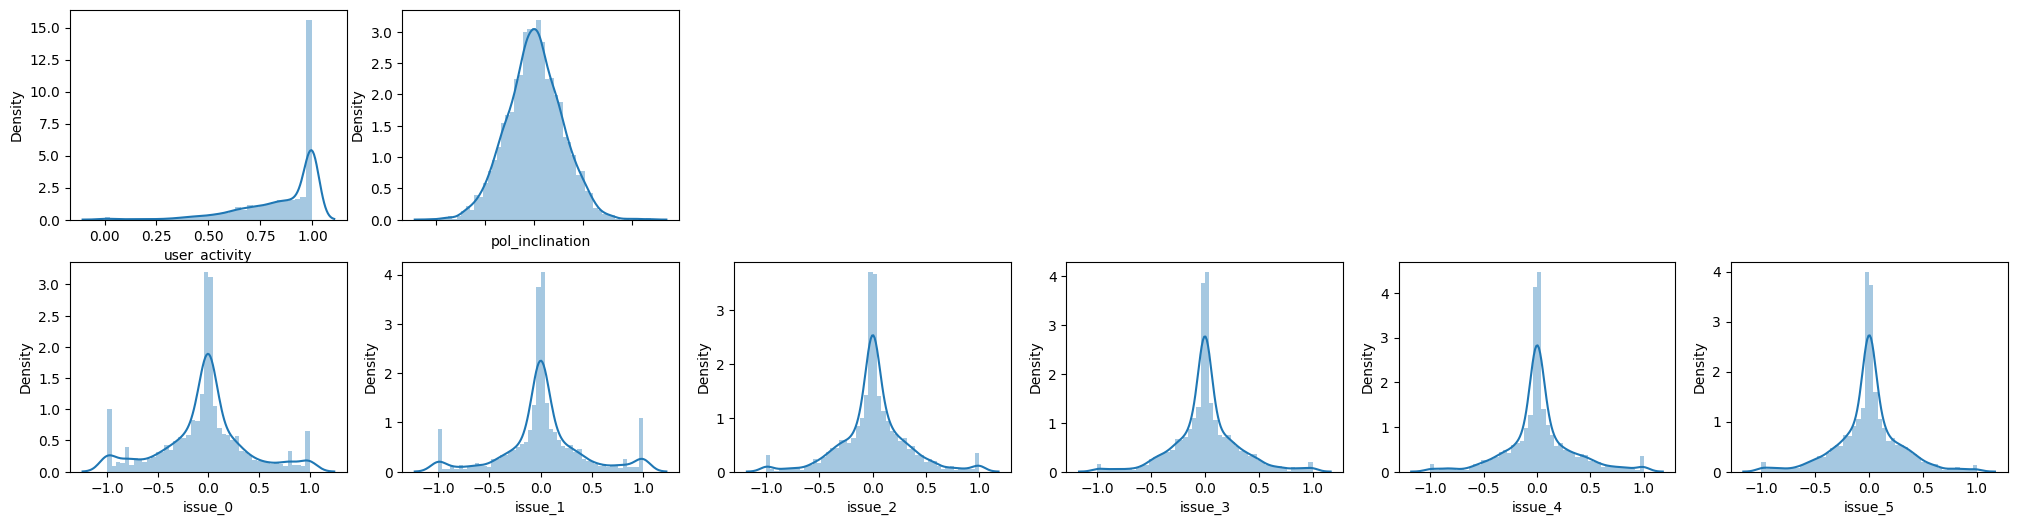

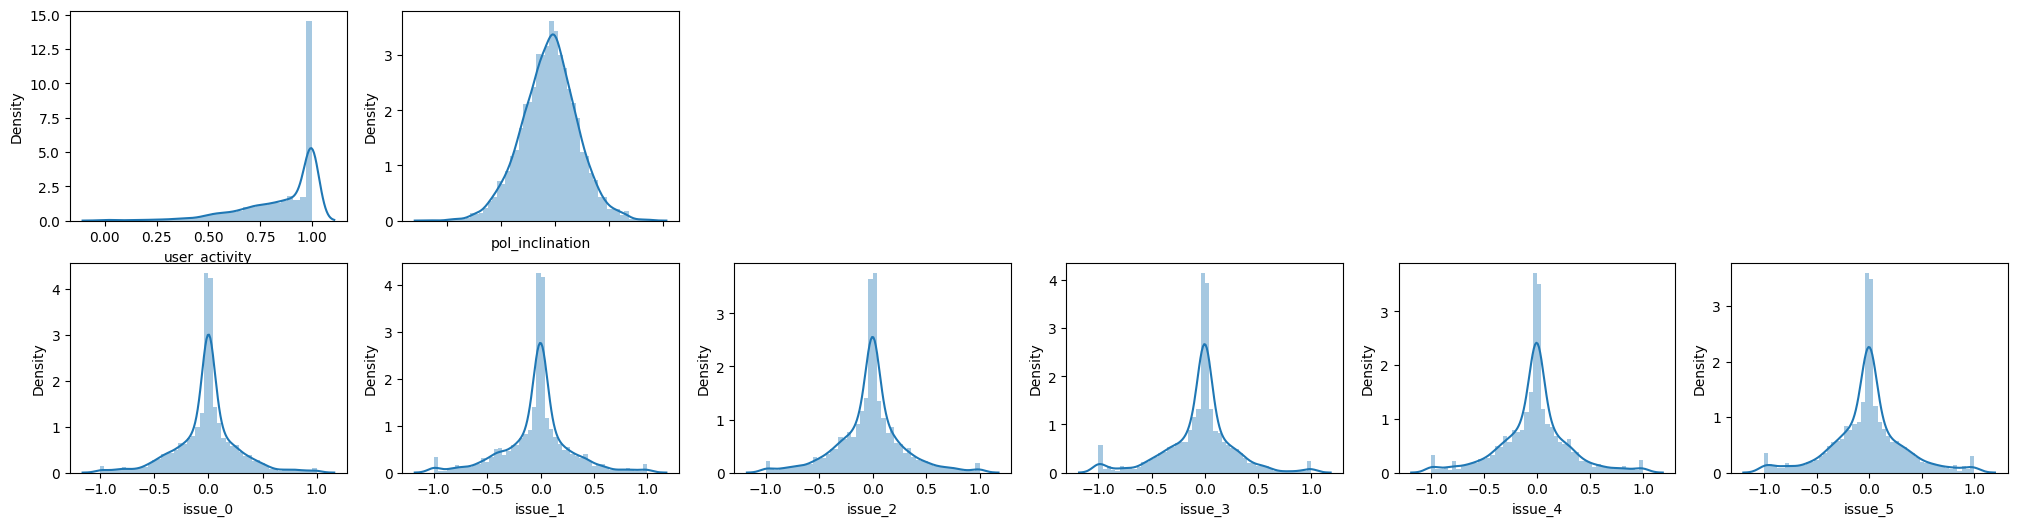

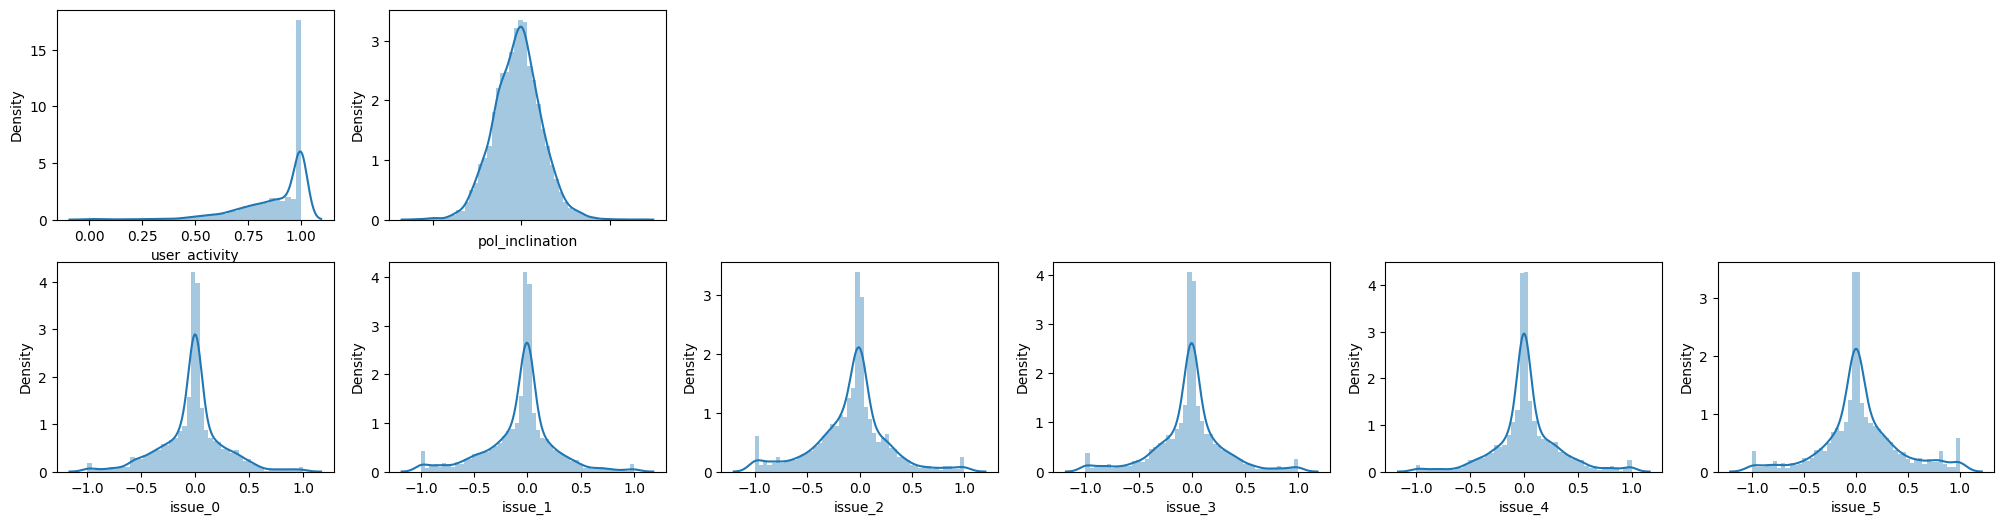

In [47]:
for run in [1,2,3,4,5,11,12,13,14,15]:
#     run = 1
    df1, df2, df3 = get_final_data(run)
    initial_data = pd.read_csv('src/data/initial_data_'+ str(run) +'.csv')
    get_data_plot_grid(df2)

In [45]:
import warnings
warnings.filterwarnings('ignore')

def get_data_plot_grid(df):

    fig = plt.figure(figsize=(25, 6))
    #fig.subplots_adjust(hspace=0.4, wspace=0.4)
    ax = fig.add_subplot(2, 6, 1)
    sns.distplot(df.user_activity,ax=ax)
#     ax = fig.add_subplot(2, 6, 2)
#     sns.distplot(df.pol_interest,ax=ax)
#     ax = fig.add_subplot(2, 6, 3)
#     sns.distplot(df.privacy_preference,ax=ax)
    ax = fig.add_subplot(2, 6, 2)
    sns.distplot(df.pol_inclination,ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax = fig.add_subplot(2, 6, 7)
    sns.distplot(df.issue_0,ax=ax)
    ax = fig.add_subplot(2, 6, 8)
    sns.distplot(df.issue_1,ax=ax)
    ax = fig.add_subplot(2, 6, 9)
    sns.distplot(df.issue_2,ax=ax)
    ax = fig.add_subplot(2, 6, 10)
    sns.distplot(df.issue_3,ax=ax)
    ax = fig.add_subplot(2, 6, 11)
    sns.distplot(df.issue_4,ax=ax)
    ax = fig.add_subplot(2, 6, 12)
    sns.distplot(df.issue_5,ax=ax)
    plt.show()

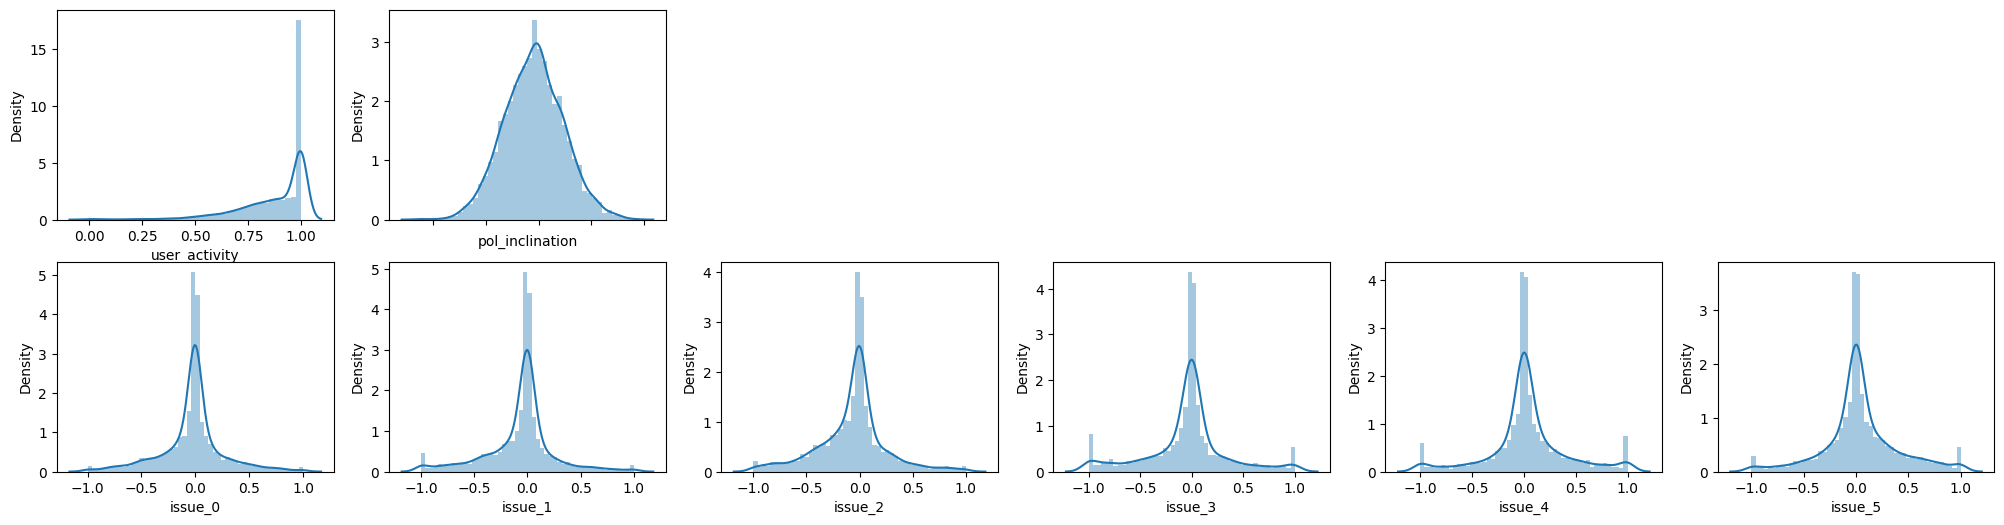

In [46]:
get_data_plot_grid(df3)

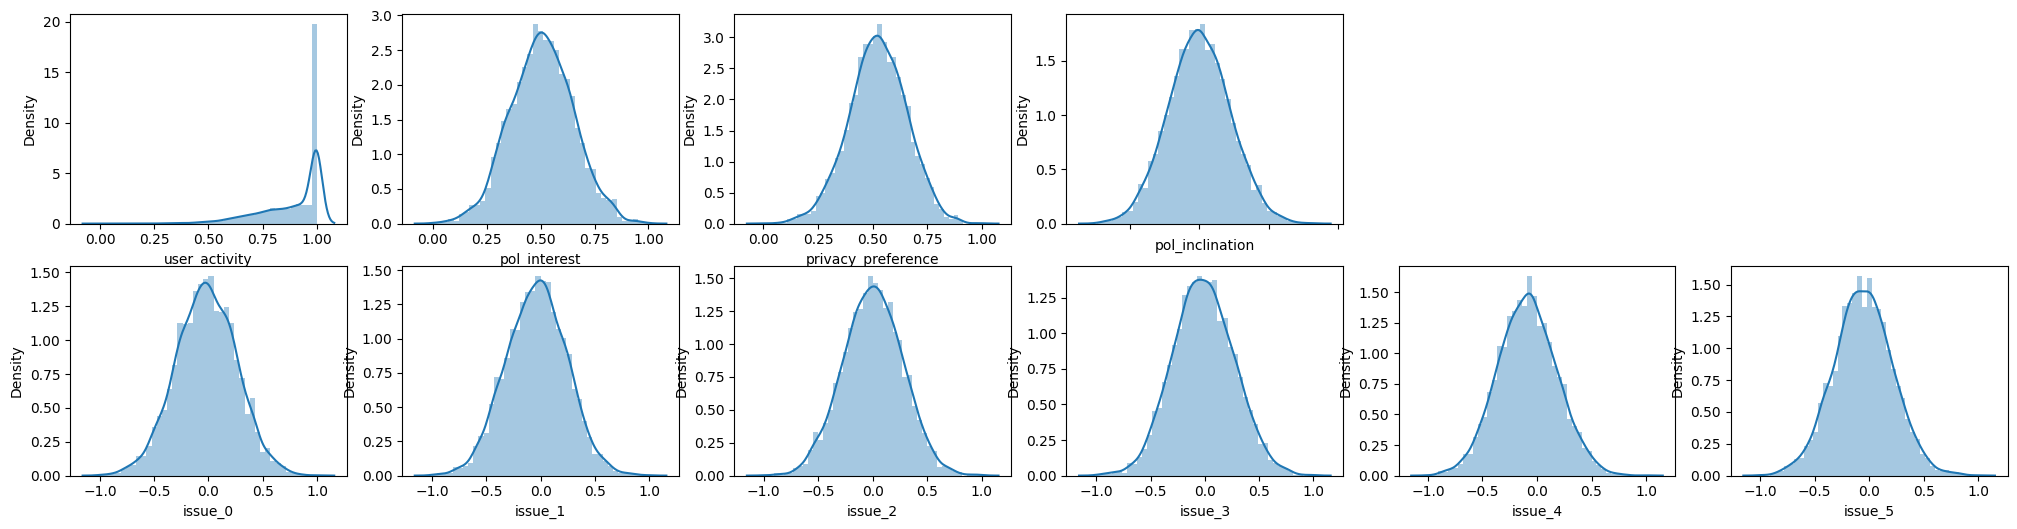

In [13]:
get_data_plot_grid(initial_data)

In [74]:
run = 1
df_fd = pd.read_csv('results/final_results/SE/final_data_' + str(run) +'00.csv')
df_id = pd.read_csv('src/data/initial_data_'+ str(run) +'.csv')

In [67]:
df_id.columns

Index(['Unnamed: 0', 'id', 'user_activity', 'pol_interest',
       'privacy_preference', 'user_satisfaction', 'issue_0', 'issue_1',
       'issue_2', 'issue_3', 'issue_4', 'issue_5', 'pol_inclination'],
      dtype='object')

In [64]:
df_id.head()

,Unnamed: 0,id,user_activity,pol_interest,privacy_preference,user_satisfaction,issue_0,issue_1,issue_2,issue_3,issue_4,issue_5,pol_inclination
0,0,0,0.694367,0.453498,0.463399,0,0.189232,0.353112,0.187286,-0.852568,-0.340718,-0.352586,0.295947
1,1,1,0.786099,0.637218,0.345457,0,0.126502,-0.185782,-0.000902,0.324246,-0.024638,-0.401190,0.121229
2,2,2,0.889255,0.505112,0.478552,0,0.267832,-0.390898,0.313542,-0.098274,-0.206426,-0.276916,0.380345
3,3,3,1.000000,0.584127,0.451143,0,0.414694,0.104018,-0.187876,0.146276,0.058960,0.166082,-0.043533
4,4,4,1.000000,0.545860,0.513887,0,0.341458,-0.211684,0.201684,-0.140032,-0.011408,-0.022154,0.301868


In [71]:
df_fd.network_polarization.iloc[-5]

0.134168

In [70]:
math.sqrt((df_id['pol_inclination'] ** 2).sum()/df1.shape[0])

0.2230478966662605

In [72]:
def compute_polarization(pol_incl):
    
    mu = 0
    pop1 = pol_incl[pol_incl > 0]
    pop2 = pol_incl[pol_incl < 0]

    if(pop1.shape[0] != 0 and pop2.shape[0] != 0):

        dA = abs(len(pop1) - len(pop2))/pol_incl.shape[0]
        d = abs(pop1.mean() - pop2.mean())/2
        mu = (1-dA) * d

    return mu

In [18]:
def plot(df_list):
    
    fig, ax = plt.subplots()
    for i, e in enumerate(df_list):
        temp = e
        plt.plot(range(len(temp)), temp)
    # ax.legend()
    plt.legend()
    plt.show()

In [75]:
compute_polarization(df_fd['pol_inclination'])

0.08990881936988385

In [76]:
compute_polarization(df_id['pol_inclination'])

0.17674057703881405

In [77]:
df_id.columns

Index(['Unnamed: 0', 'id', 'user_activity', 'pol_interest',
       'privacy_preference', 'user_satisfaction', 'issue_0', 'issue_1',
       'issue_2', 'issue_3', 'issue_4', 'issue_5', 'pol_inclination'],
      dtype='object')

In [82]:
df_id[['issue_0', 'issue_1', 'issue_2', 'issue_3', 'issue_4', 'issue_5']].mean(axis=1), df_id['pol_inclination']

(0      -0.136040
 1      -0.026961
 2      -0.065190
 3       0.117026
 4       0.026311
           ...   
 4034   -0.021801
 4035    0.032172
 4036   -0.165821
 4037   -0.162554
 4038   -0.163261
 Length: 4039, dtype: float64,
 0       0.295947
 1       0.121229
 2       0.380345
 3      -0.043533
 4       0.301868
           ...   
 4034   -0.453382
 4035   -0.239543
 4036   -0.049004
 4037   -0.192142
 4038    0.130373
 Name: pol_inclination, Length: 4039, dtype: float64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


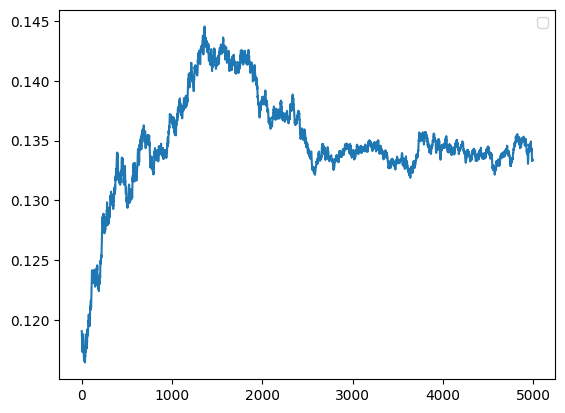

In [20]:
plot([df1.network_polarization])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


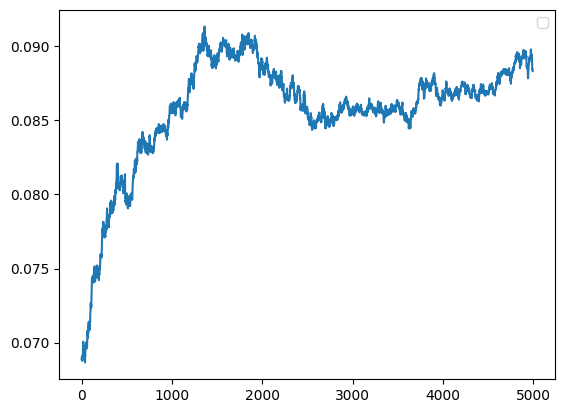

In [21]:
plot([df1.net_polarization2])

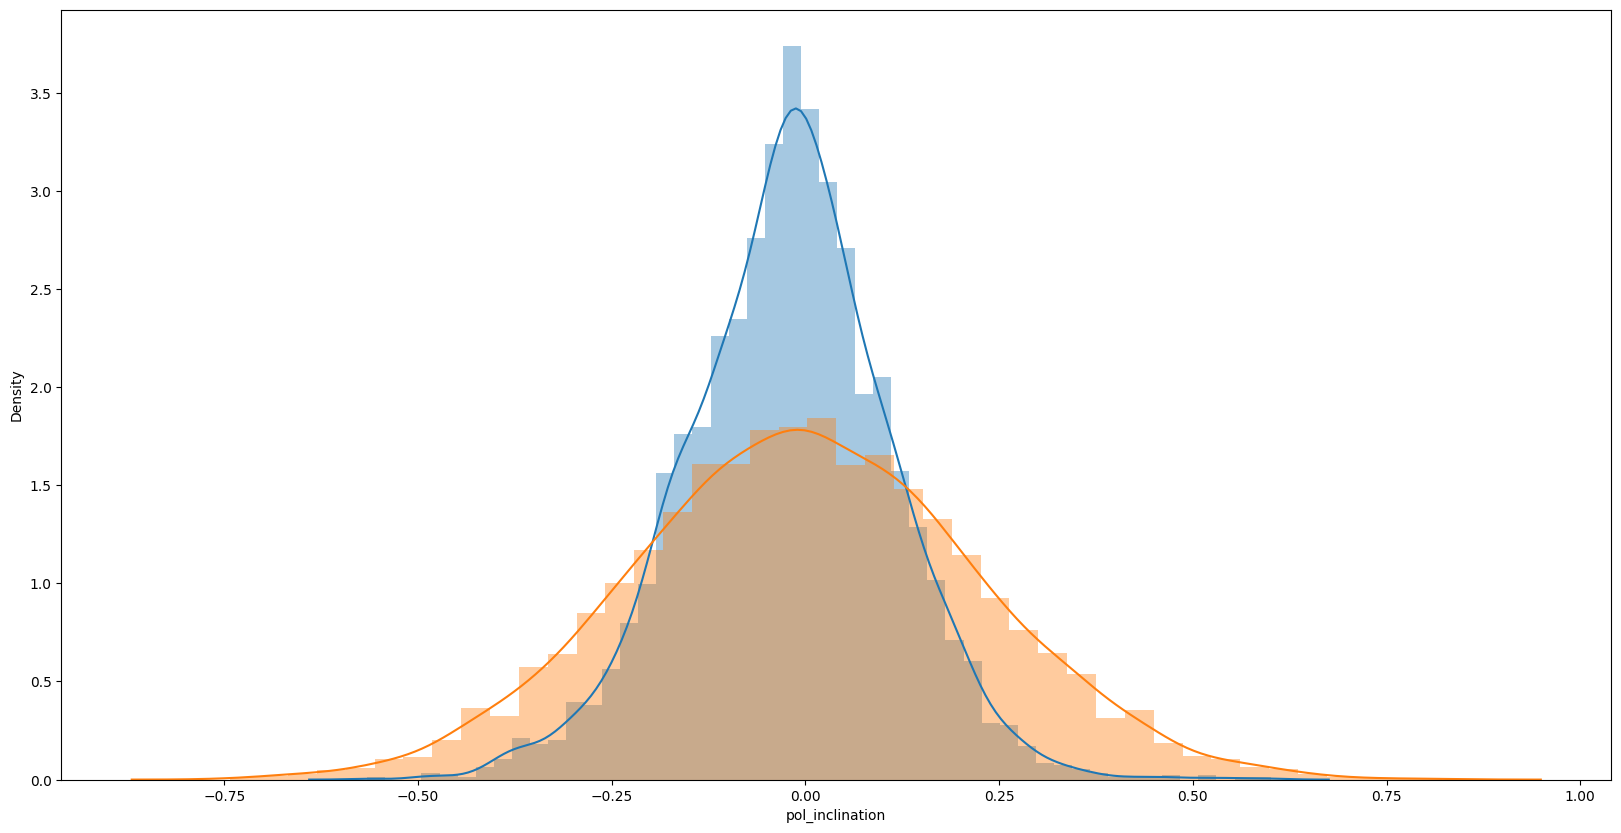

In [27]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
import seaborn as sns
sns.distplot(df1['pol_inclination'],ax=ax)
sns.distplot(initial_data['pol_inclination'],ax=ax)
plt.show()

In [34]:
df1['pol_inclination'].sum()

-89.2991407510306

In [35]:
initial_data['pol_inclination'].sum()

-2.1945020000001803

In [53]:
math.sqrt((df1['pol_inclination'] ** 2).sum()/df1.shape[0])

0.1309335283188826

In [54]:
math.sqrt((initial_data['pol_inclination'] ** 2).sum()/initial_data.shape[0])

0.22822571265274208

In [50]:
import math
pol1 = round(math.sqrt(sum([x*x for x in df1['pol_inclination']])/df1.shape[0]), 6)
pol2 = round(math.sqrt(sum([x*x for x in initial_data['pol_inclination']])/initial_data.shape[0]), 6)

In [51]:
pol1, pol2

(0.130934, 0.228226)